# Цель проекта 
## провести разведывательный анализ данных условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

df = pd.read_csv('stud_math.csv')
df.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

### Создадим тепловую карту пропущенных значений

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

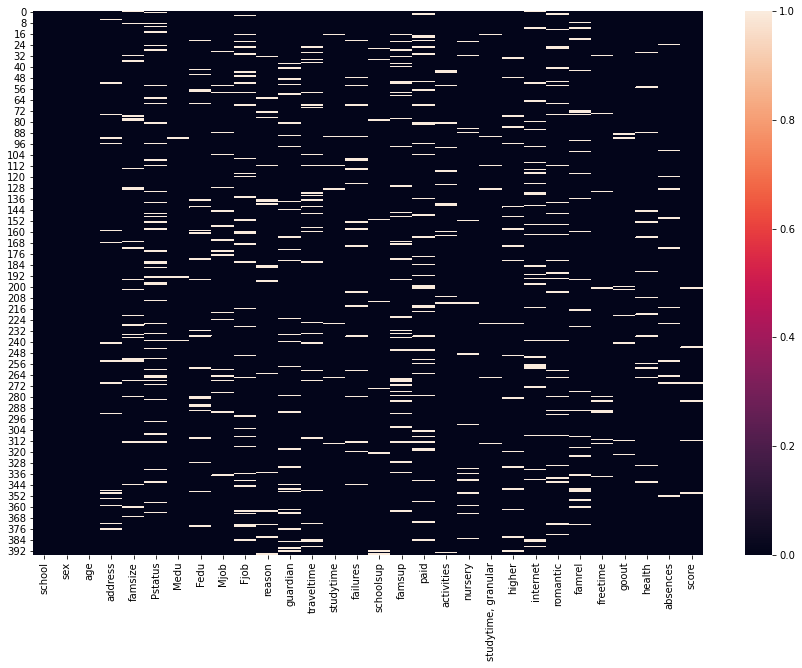

In [3]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.isna())
df.isna().sum()

Таким образом датафрейм состоит из 30 столбцов (13 числовых и 17 объектных) и 395 строк, есть много пропущенных значений. 



### Целевым столбцом является 'score' и в нем есть всего 6 пропущенных значений - можем от них избавиться:

In [4]:
df = df.dropna(subset=['score'])

Найдем столбцы, в которых пропущенныx значений их более 10% и заменим пропуски в соответствии с процентным распределением значений:

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isna())
    if round(pct_missing*100) >= 10:
        print('{} - {}%'.format(col, round(pct_missing*100)))

Pstatus - 12%
famsup - 10%
paid - 10%


In [6]:
def fill_nan(column):
    '''Заполенение пропущенных категориальных занчений в процентном соотношении'''
    count = column.value_counts(normalize=True)
    count_0 = int(round((column.isna().sum() * count[0])))
    count_1 = int(round((column.isna().sum() * count[1])))
    column.fillna(count.index[0], limit=count_0, inplace=True)
    column.fillna(count.index[1], limit=count_1, inplace=True)


fill_nan(df['Pstatus'])
fill_nan(df['famsup'])
fill_nan(df['paid'])

## Посмотрим на числовые колонки:

In [7]:
df_numb = df.select_dtypes(include=[np.number])
df_numb.head()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,-6.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,-6.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,-6.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,-9.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,-6.0,4.0,3.0,2.0,5.0,4.0,50.0


#  'score' - целевая колонка

Выведем гистограмму, боксплот и базовые статистические данные:

C:\Users\Radiologist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

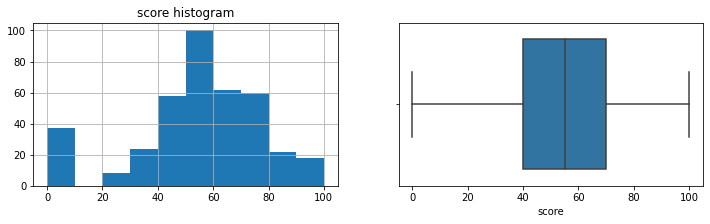

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
df['score'].hist(ax=axes[0])
axes[0].set_title('score histogram')
sns.boxplot(df['score'], ax=axes[1])

df['score'].describe()

Данные 'score' не имею выбросов, представляют собой значения стобальной шкалы с практически нормальным распределением за исключением значительного количества нулевых значений - это либо отсутствующие данные, либо это те ученики, которые по каким-либо причинам не были допущены к экзамену.

Рассмотрим остальные числовые колонки.
Недостающие значения заменим медианой.

In [9]:
def fill_nan_numb(col):
    '''замена пропусков медианой'''
    return col.fillna(col.median())

In [10]:
# замена пропусков в числовых колонках на медиану
for col in df_numb.columns.values:
    df[col] = fill_nan_numb(df[col])

Для каждой колонки построим гистограмму и боксплоты для оценки выбросов.

In [11]:
def get_hist_box(column):
    ''' построение гистограммы и боксплота'''
    fig, axes = plt.subplots(1, 2, figsize=(12, 2))
    vol = len(df[column].value_counts())
    axes[0].hist(df[column], bins=vol*2 - 1)
    axes[0].set_title('Histogram for ' + column)

    sns.boxplot(data=df[column], ax=axes[1])
    axes[1].set_title('Boxplot for ' + column)

 # - Возраст

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

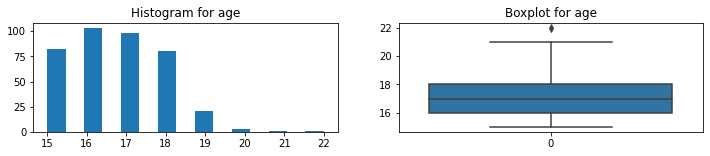

In [12]:
get_hist_box('age')
df['age'].describe()

In [13]:
df['age'].value_counts().sort_index()

15     82
16    103
17     98
18     80
19     21
20      3
21      1
22      1
Name: age, dtype: int64

Отмечаем наличие выброса, однако исключать его не стоит, т.к. он всего на 1 больше значений, не выходящих за рамки выброса. Хотя и странно видеть учеников в возрасте 20 и более лет. 

# - Образование родителей

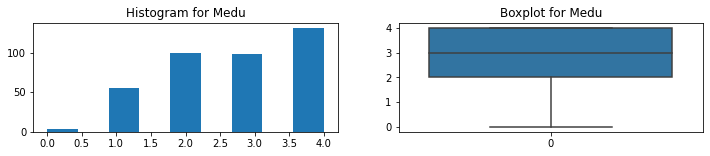

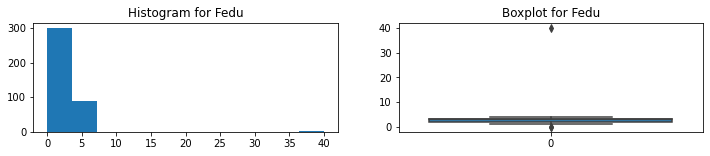

In [14]:
get_hist_box('Medu')
get_hist_box('Fedu')

Очевидно, что данные 'Fedu'  содержат выброс - значения не могут быть больше 4. Возможно ошибка ввода. Заменим его на медианное значение.

In [15]:
df['Fedu'][df['Fedu'] > 4] = df['Fedu'].median()

<ipython-input-15-966b1b83d897>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fedu'][df['Fedu'] > 4] = df['Fedu'].median()


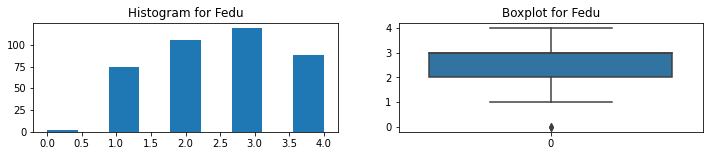

In [16]:
get_hist_box('Fedu')

Имеется выброс нулевого значения, но нельзя сказать, что он ошибочный, не удаляем. 

<AxesSubplot:ylabel='Frequency'>

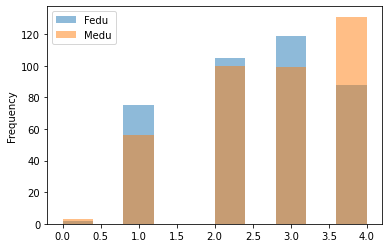

In [17]:
df[['Fedu', 'Medu']].plot(kind='hist', alpha=0.5)

Обращает внимание, что матерей с высшим образованием практически на треть больше, чем отцов. 

# - в ремя в пути до школы

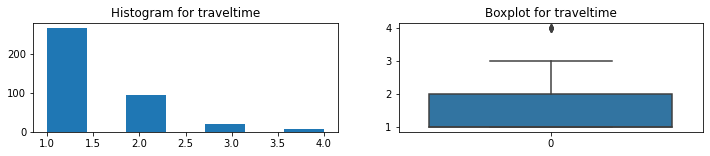

In [18]:
get_hist_box('traveltime')

выбросов не наблюдается, подавляющее большинство добирается до школы менее 15 минут 

# - время на учёбу помимо школы

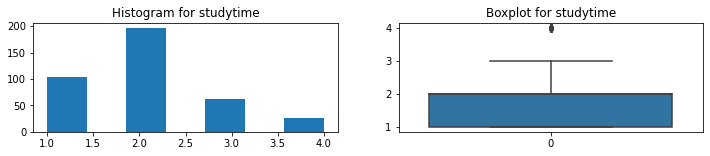

In [19]:
get_hist_box('studytime')

выбросы есть в максимальном значении - это значит, что единицы тратят на обучение вне школы более 10 часов в неделю

# - количество внеучебных неудач

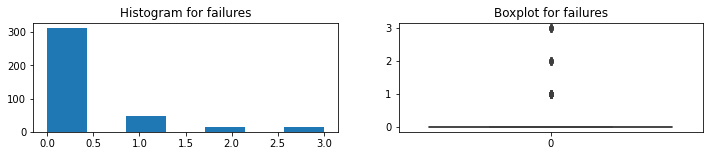

In [20]:
get_hist_box('failures')

Замечаем, что подавляющее большинство довольно удачливы.

# -studytime, granular

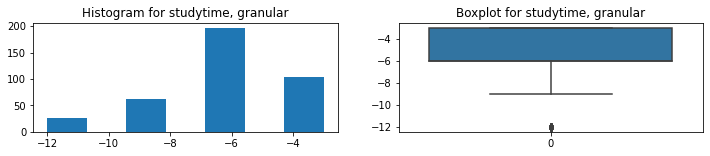

In [21]:
get_hist_box('studytime, granular')

Загадочная колонка с наличием выбросов. 

# -семейные отношения

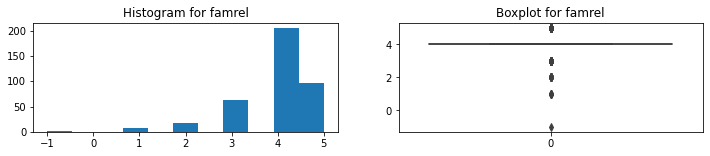

In [22]:
get_hist_box('famrel')

Отрицательных значений быть не может - вероятно ошибка при вводе. Исправим:

In [23]:
df['famrel'][df['famrel'] < 0] = df['famrel'][df['famrel'] < 0] * \
    (-1)  # замена отрицательных значений на положительные

<ipython-input-23-64841226f054>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['famrel'][df['famrel'] < 0] = df['famrel'][df['famrel'] < 0] * \


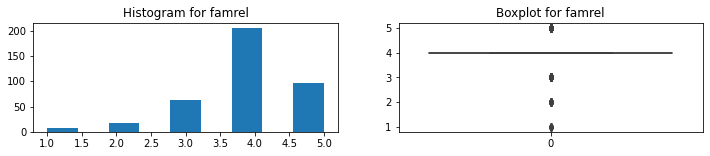

In [24]:
get_hist_box('famrel')

Большинство на семейные отношения не жалуются. 

# - свободное время

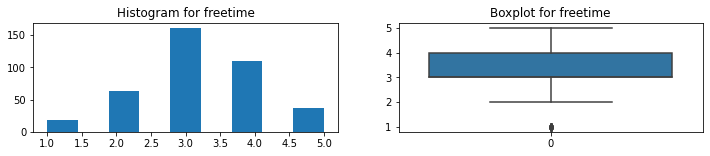

In [25]:
get_hist_box('freetime')

Ничего интересного.

# - друзья

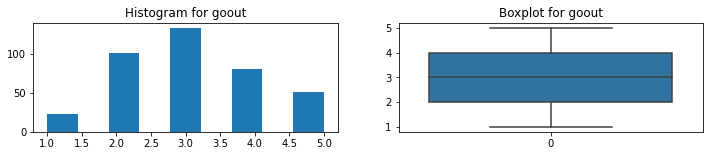

In [26]:
get_hist_box('goout')

Самое нормальное распределение среди представленных данных. На друзей времени чаще хватает, чем нет.

# - здоровье

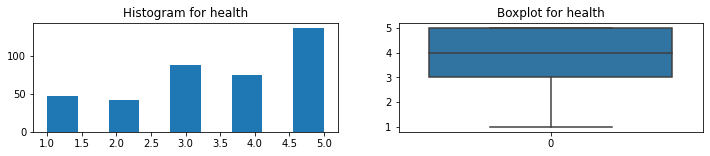

In [27]:
get_hist_box('health')

Довольно много значений плохого и очень плохого здоровья - возможно эти ученики и не присутствовали на экзамене. Проверим:

8.98876404494382

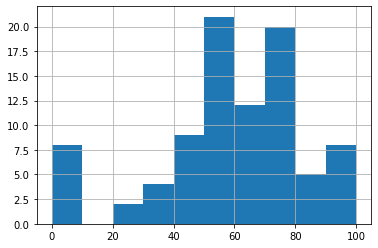

In [28]:
df[df['health'] <= 2]['score'].hist()
df[df['health'] <= 2]['score'].value_counts(
    normalize=True)[0] * 100  # процент учеников с нулевым скором

Однако мы видим, что только около 9% учеников, оценивающие свое здоровье на 2 и ниже имеют в графе 'score' 0. Логично предположить, что нулевые значения 'score'  - это не заполненные даннные.

# - пропуски занятий

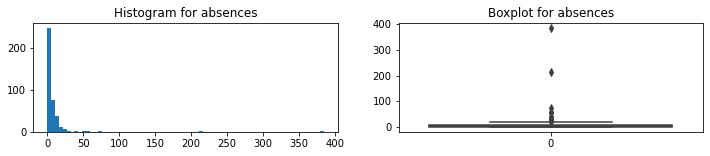

In [29]:
get_hist_box('absences')

Имеется много выбросов. Рассмотрим пристальнее:

In [30]:
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


Видим, что в выбросы попали значения больше 20. Возможно от них стоит избавится, но для начала проверим степень корреляции с целевым столбцом: 

In [31]:
display('filtered', df[df['absences'] <= 20][['absences', 'score']].corr())
display('not filtered', df[['absences', 'score']].corr())

'filtered'

,absences,score
absences,1.000000,0.078401
score,0.078401,1.000000


'not filtered'

,absences,score
absences,1.000000,0.062642
score,0.062642,1.000000


Видим, что степень корреляции не сильно меняется, поэтому данные выбросы можно не удалять.

# Тепловая карта корреляции

создадим тепловую карту корреляции числовых показателей с учетом того, что нулевые значения в графе 'score' это отсутствующие данные 

<AxesSubplot:>

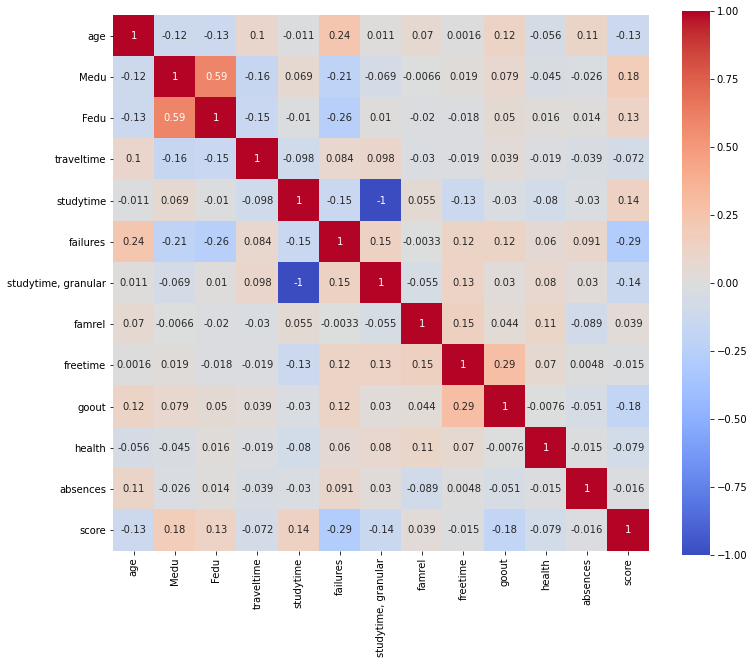

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[df['score'] != 0].corr(), annot=True,
            fmt='.2g',
            cmap='coolwarm',
            square=True
            )

Обращает внимание, что данные в целом имеют слабую и очань слабую корреляционную связь с целевым параметром 'score'. Среднюю положительную корелляционную связь можно наблюдать между значениями 'Medu' и 'Fedu' - довольно логично - чаще в паре будут находиться люди со схожим уровнем образования. Отмечается, что значения 'studytime' и 'studytime, granular' полностью обратно взаимосвязанные величины, поэтому можем исключить один из этих параметров. Пусть это будет 'studytime, granular', т.к. к нему  нет никакого описания.

In [33]:
 df.drop('studytime, granular', axis=1, inplace=True) 

## Рассмотрим категориальные значения:

In [34]:
df_no_numb = df.select_dtypes(exclude=[np.number])
df_no_numb.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,NaN,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,NaN,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,NaN
3,GP,F,U,GT3,T,health,NaN,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


Заполним недостающие значения модой



In [35]:
def fill_nan_no_numb(col):
    '''заполнение пропусков модой'''
    return col.fillna(col.mode()[0])

In [36]:
for col in df_no_numb.columns.values:
    df[col] = fill_nan_no_numb(df[col])

Для каждого параметра выведем гистограмму для поиска ошибок ввода значений.

In [37]:
def get_hist(column):
    '''Вывод гистограммы'''
    fig, ax = plt.subplots(figsize=(4, 4))
    df[column].hist()
    plt.xticks(rotation=0)
    ax.set_title('Histogram for ' + column)
    plt.show()

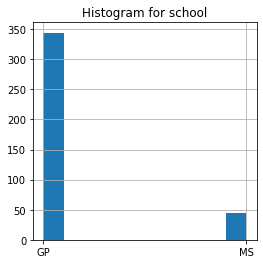

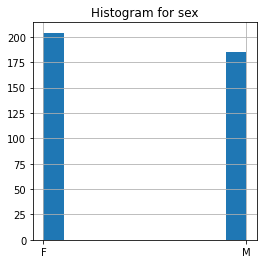

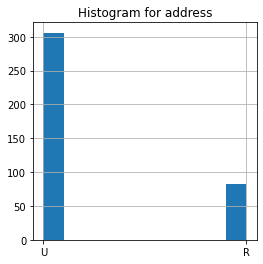

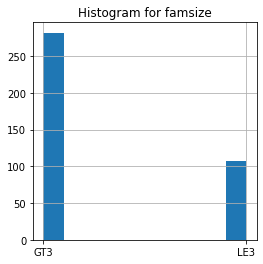

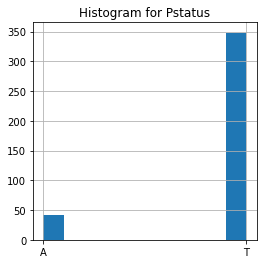

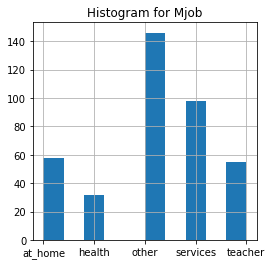

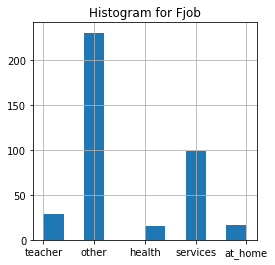

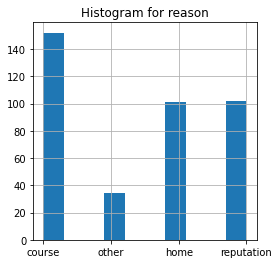

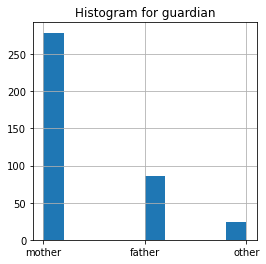

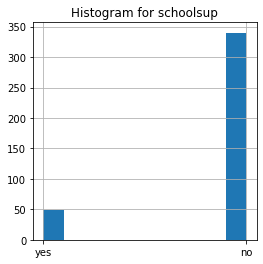

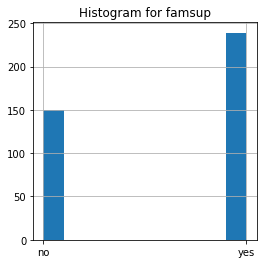

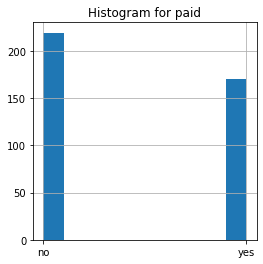

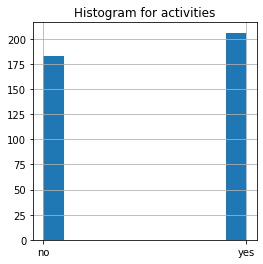

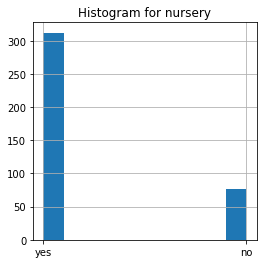

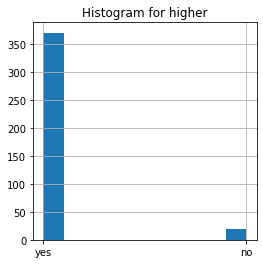

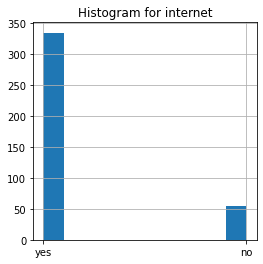

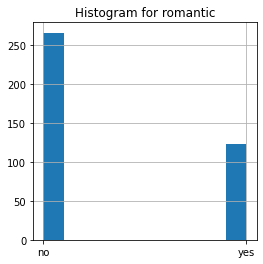

In [38]:
for col in df_no_numb.columns.values:
    get_hist(col)

Ошибок не наблюдается. 
Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. 

In [39]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [40]:
for col in df_no_numb.columns.values:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Таким образом важные номинативные переменные, которые, возможно, оказывают влияние на оценку, это: 'address', 'Mjob', 'higher', 'romantic', 'score'

## ВЫВОДЫ
В результате EDA для анализа влияния параметров условий жизни учащихся на их успеваемость по математике было выяылено:
    
    1. практически во всех столбцах имелись пропуски, одкако их объем лишь в 3 случаях превысил 10%     
    2. среди числовых значений имелись ошибочные данные 
    3. параметр 'studytime, granular' можно удалить, тк он дублирует параметр 'studytime'
    4. ошибок ввода в категориальных значениях не обнаружено    
    5. важные номинативные параметры, которые предлагается использовать в дальнейшем для построения модели, это 'address', 'Mjob', 'higher', 'romantic', 'score'
    